In [4]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, SecondLocator, DateFormatter
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path

import random
import pickle
import configparser
import numpy as np
import pandas as pd

import aeon
import aeon.io.api as api
from aeon.io import reader, video
from aeon.schema.dataset import exp02
from aeon.analysis.utils import visits, distancetravelled

In [5]:
# Get relevant time periods


# Long, individual session
root = [Path("/ceph/aeon/aeon/data/raw/AEON2/experiment0.2")]

# Ensure root exists
if not np.all([path.exists() for path in root]):
    print("Cannot find root paths. Check path names or connection.")
subject_events = api.load(root, exp02.ExperimentalMetadata.SubjectState)

# Get > 24 hour sessions of animals starting with "BAA"
sessions = visits(subject_events[subject_events.id.str.startswith("BAA-")])
sessions = sessions[sessions.duration > pd.Timedelta("24 hours")]
display(sessions)

,id,weight_enter,weight_exit,enter,exit,duration
0,BAA-1100700,26.40,28.10,2022-02-23 14:21:25.550300121,2022-02-25 16:00:50.076419830,2 days 01:39:24.526119709
8,BAA-1100699,26.75,29.00,2022-03-29 13:11:37.277699947,2022-04-04 09:16:51.086110115,5 days 20:05:13.808410168
10,BAA-1100701,26.70,30.60,2022-04-04 15:54:07.945059776,2022-04-08 16:34:36.183650017,4 days 00:40:28.238590241
11,BAA-1100699,29.00,28.20,2022-04-20 11:51:24.997630119,2022-04-28 10:02:56.655809879,7 days 22:11:31.658179760
14,BAA-1100702,27.00,28.90,2022-05-03 11:08:12.660739899,2022-05-12 09:21:42.411650181,8 days 22:13:29.750910282
15,BAA-1100703,30.30,29.50,2022-05-25 08:59:51.050459862,2022-06-06 07:55:37.501309872,11 days 22:55:46.450850010
32,BAA-1102227,24.10,24.07,2022-08-24 12:57:30.558179855,2022-08-31 12:24:00.331900120,6 days 23:26:29.773720265
33,BAA-1102223,30.30,29.10,2022-09-26 10:37:39.908189774,2022-10-03 09:10:14.448420048,6 days 22:32:34.540230274
34,BAA-1102224,28.80,27.90,2022-10-03 11:04:29.183259964,2022-10-10 11:00:44.072539806,6 days 23:56:14.889279842


In [6]:
# Load some data

# Set time range to get data from based on one of the above "sessions"
start, end = pd.Timestamp("2022-05-25 09:00:00"), pd.Timestamp("2022-05-27 12:00:00")

# Load position data
mouse_pos = api.load(root, exp02.CameraTop.Position, start=start, end=end)
display(mouse_pos)

,x,y,angle,major,minor,area,id
time,,,,,,,
2022-05-25 09:00:00.018559933,1128.485352,377.081421,1.400470,40.002785,15.242581,632.5,0.0
2022-05-25 09:00:00.038527966,1128.333374,374.231598,1.367503,39.120983,15.174746,616.0,0.0
2022-05-25 09:00:00.058559895,1127.752686,371.373230,1.375104,38.317028,15.396613,610.0,0.0
2022-05-25 09:00:00.078527927,1127.116333,368.639618,1.366908,38.901909,15.832431,635.0,0.0
2022-05-25 09:00:00.098559856,1126.835571,366.416992,1.389153,38.970348,16.226841,649.5,0.0
...,...,...,...,...,...,...,...
2022-05-27 11:59:59.901184082,205.433670,500.189880,-1.353932,29.464125,13.470876,402.0,0.0
2022-05-27 11:59:59.921216011,205.463257,499.851807,-1.358812,29.499846,13.423874,401.5,0.0
2022-05-27 11:59:59.941184044,205.539062,499.406494,-1.360125,29.958260,13.168024,401.0,0.0


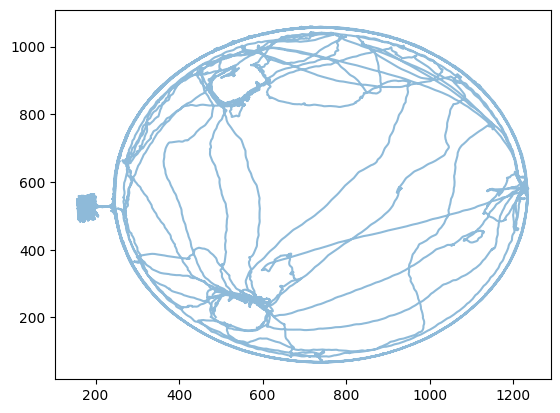

In [7]:
# Create some plots

# Plot _ hours of position activity
sub_start, sub_end = pd.Timestamp("2022-05-26 09:00:00"), pd.Timestamp("2022-05-26 12:00:00")
mouse_pos_sub = mouse_pos = api.load(root, exp02.CameraTop.Position, start=sub_start, end=sub_end)

fig, ax = plt.subplots(1, 1)
ax.plot(mouse_pos_sub.x, mouse_pos_sub.y, alpha=0.5)

In [8]:
positions = [mouse_pos_sub.x.to_numpy(), mouse_pos_sub.y.to_numpy()]

In [9]:
np.save("Positions.npy", positions)

In [ ]:
dt = 0.02

pos_x0_manual, pos_y0_manual = positions[0, 0], positions[1, 0]
vel_x0_manual, vel_y0_manual = 0.0, 0.0
acc_x0_manual, acc_y0_manual = 0.0, 0.0

sigma_a_manual = 1e4
sigma_x_manual = 1e2
sigma_y_manual = 1e2
sqrt_diag_V0_value_manual = 1e-3

m0_manual = np.array([pos_x0_manual, vel_x0_manual, acc_x0_manual,
                      pos_y0_manual, vel_y0_manual, acc_y0_manual], dtype=np.double)
V0_manual = np.diag(np.ones(len(m0_manual))*sqrt_diag_V0_value_manual**2)
R_manual = np.diag([sigma_x_manual**2, sigma_y_manual**2])


B = np.array([[1, dt, .5*dt**2, 0, 0, 0],
              [0, 1,  dt,       0, 0, 0],
              [0, 0,  1,        0, 0, 0],
              [0, 0,  0,        1, dt, .5*dt**2],
              [0, 0,  0,        0, 1,  dt],
              [0, 0,  0,        0, 0,  1]], dtype=np.double)
Z = np.array([[1, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0]], dtype=np.double)
Qe = np.array([[dt**5/20, dt**4/8, dt**3/6, 0, 0, 0],
               [dt**4/8, dt**3/3,  dt**2/2, 0, 0, 0],
               [dt**3/6, dt**2/2,  dt,      0, 0, 0],
               [0, 0, 0,                    dt**5/20, dt**4/8, dt**3/6],
               [0, 0, 0,                    dt**4/8, dt**3/3,  dt**2/2],
               [0, 0, 0,                    dt**3/6, dt**2/2,  dt]],
              dtype=np.double)

Q_manual = Qe*sigma_a_manual

In [15]:
Q_learned, m0_learned, V0_learned, R_learned = [],[],[],[]
for i in range(50):
    y = positions[:, i*10800:np.min((i+1)*10800, len(positions[0]))]
    
    skip_estimation_sigma_a = False
    skip_estimation_R = False
    skip_estimation_m0 = False
    skip_estimation_V0 = False


    # LBFGS optimization algorithm: approximates the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm using a limited amount of computer memory
    lbfgs_n_epochs = 75               ## The number of epochs for training
    lbfgs_max_iter = 2                ## Maximum number of iterations for the L-BFGS optimization algorithm in one epoch
    lbfgs_tolerance_grad = -1         ## Tolerance for stopping criterion with respect to gradients
    lbfgs_tolerance_change = 1e-3     ## A convergence criterion 
                                        ### The optimization will stop if the absolute value of the difference 
                                        ### in the loss between two consecutive iterations 
                                        ### is less than this value 
    lbfgs_lr = 0.01                   ## learning rate for the optimization. 
                                        ### A learning rate determines the step size at each iteration 
                                        ### while moving toward a minimum of the loss function

    lbfgs_tol = 1e-3
    Qe_reg_param_learned = 1e-2

    m0_torch = torch.from_numpy(m0_manual.copy())
    sqrt_diag_V0_torch = torch.DoubleTensor([sqrt_diag_V0_value_manual
                                            for i in range(len(m0_manual))])

    sqrt_diag_R_torch = torch.DoubleTensor([sigma_x_manual, sigma_y_manual])

    # Regularize Qe
    if Qe_reg_param_learned is not None:
        Qe_regularized_learned = Qe + Qe_reg_param_learned * np.eye(Qe.shape[0]) ## np.eye: identity matrix
        # Tikhonov or Ridge regularization. 
        # This regularization tends to ensure that the matrix remains positive definite and stabilizes its inversion if used in subsequent calculations
    else:
        Qe_regularized_learned = Qe
        
    y_torch = torch.from_numpy(y.astype(np.double))
    B_torch = torch.from_numpy(B.astype(np.double))
    Qe_regularized_learned_torch = torch.from_numpy(Qe_regularized_learned.astype(np.double))
    Z_torch = torch.from_numpy(Z.astype(np.double))

    vars_to_estimate = {} # Determine which parameters of a Kalman filter should be estimated
    if skip_estimation_sigma_a: vars_to_estimate["sigma_a"] = False
    else:                       vars_to_estimate["sigma_a"] = True

    if skip_estimation_R: vars_to_estimate["sqrt_diag_R"], vars_to_estimate["R"] = False, False
    else:
                        vars_to_estimate["sqrt_diag_R"], vars_to_estimate["R"] = True, True

    if skip_estimation_m0: vars_to_estimate["m0"] = False
    else:                  vars_to_estimate["m0"] = True

    if skip_estimation_V0: vars_to_estimate["sqrt_diag_V0"], vars_to_estimate["V0"] = False, False
    else:                  vars_to_estimate["sqrt_diag_V0"], vars_to_estimate["V0"] = True, True

    optim_res_learned = learning.torch_lbfgs_optimize_SS_tracking_diagV0(
        y=y_torch, B=B_torch, sigma_a0=sigma_a_manual,
        Qe=Qe_regularized_learned_torch, Z=Z_torch, sqrt_diag_R_0=sqrt_diag_R_torch, m0_0=m0_torch,
        sqrt_diag_V0_0=sqrt_diag_V0_torch, max_iter=lbfgs_max_iter, lr=lbfgs_lr,
        vars_to_estimate=vars_to_estimate, tolerance_grad=lbfgs_tolerance_grad,
        tolerance_change=lbfgs_tolerance_change, n_epochs=lbfgs_n_epochs,
        tol=lbfgs_tol)
    
    Q_learned.append(optim_res_learned["estimates"]["sigma_a"].item()**2*Qe)
    m0_learned.append(optim_res_learned["estimates"]["m0"].numpy())
    V0_learned.append(np.diag(optim_res_learned["estimates"]["sqrt_diag_V0"].numpy()**2))
    R_learned.append(np.diag(optim_res_learned["estimates"]["sqrt_diag_R"].numpy()**2))

539996